# Element 4: Road Segmentation <br/>

**Abstract:** <br/>
Traffic accidents have become one of the most serious problems in today’s world. Increase in the number of vehicles, human errors towards traffic rules and the difficulty to oversee situational dangers by drivers are contributing to the majority of accidents on the road. Lane detection is an essential component for autonomous vehicles. <br/>
In this project we take a simple image/video as input data and process it to detect the lane within which the vehicle is moving. Then we find a representative line for both the left and right lane lines and render those representations back out to the video as a red overlay.
<br/><br/>


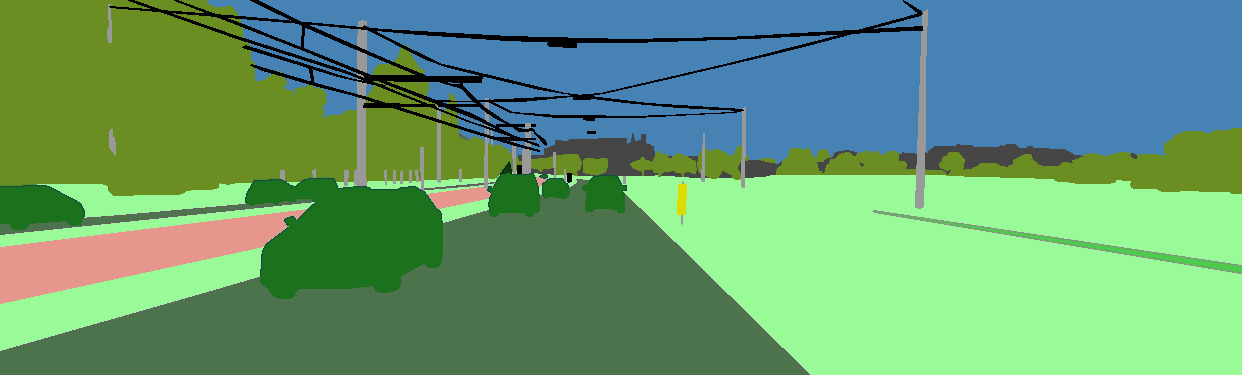


**Team Members:** <br/><br/>

| Name | Roll No. | Email |
| :- | ----: | :- |
| Aradhita Menghal | 04 | menghalar@rknec.edu
| Urvi Negi | 16 | negiu@rknec.edu
| Akshat Chandak | 35 | chandaka@rknec.edu
| Shreyas Nemani | 77 | nemanism@rknec.edu
| Shubham Jha | 78 | jhasm@rknec.edu


<br/><br/><br/><br/>

# Importing Libraries

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

<br/><br/>
**Segmentation Models:** Segmentation models is python library with Neural Networks for Image Segmentation based on Keras (Tensorflow) framework. <br/><br/>
**Keras:** Keras is an API designed for human beings, not machines. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear & actionable error messages. It also has extensive documentation and developer guides.
<br/><br/>
**Sklearn:**  The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction
<br/><br/>
**Tensorflow:** TensorFlow is a free and open-source software library for machine learning. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.
<br/><br/>
**Versions:**


*   Tensorflow: 1.13.1
*   Keras: 2.4.2
*   Keras-Application: 1.0.7
<br/><br/>



In [ ]:
from segmentation_models import Unet
from segmentation_models.backbones import get_preprocessing
from keras.layers import Input, Conv2D
from keras.models import Model
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

ModuleNotFoundError: ignored

# Setting up the Working Directory

In [ ]:
os.chdir('/content/drive/My Drive/segmentation/')
path='.'

In [ ]:
from zipfile import ZipFile
with ZipFile('/') as z:
  z.extractall()

# Extracting the images from the dataset

In [ ]:
IMAGE_HEIGHT=128
IMAGE_WIDTH=128

In [ ]:
original = os.listdir('./training/image_2')
print("Original:\n", original)

masks=os.listdir('./training/semantic')
print("\n\nMasks:\n",masks)

original.sort()
masks.sort()

Original:
 ['000000_10.png', '000002_10.png', '000004_10.png', '000003_10.png', '000001_10.png', '000007_10.png', '000008_10.png', '000006_10.png', '000005_10.png', '000009_10.png', '000010_10.png', '000011_10.png', '000013_10.png', '000012_10.png', '000014_10.png', '000015_10.png', '000016_10.png', '000017_10.png', '000019_10.png', '000018_10.png', '000021_10.png', '000020_10.png', '000022_10.png', '000023_10.png', '000024_10.png', '000026_10.png', '000025_10.png', '000027_10.png', '000028_10.png', '000030_10.png', '000031_10.png', '000029_10.png', '000032_10.png', '000033_10.png', '000034_10.png', '000036_10.png', '000035_10.png', '000037_10.png', '000038_10.png', '000040_10.png', '000039_10.png', '000041_10.png', '000042_10.png', '000043_10.png', '000044_10.png', '000045_10.png', '000046_10.png', '000047_10.png', '000048_10.png', '000049_10.png', '000051_10.png', '000050_10.png', '000052_10.png', '000053_10.png', '000054_10.png', '000055_10.png', '000056_10.png', '000057_10.png', '0

In [ ]:
y= np.zeros((len(masks),IMAGE_HEIGHT,IMAGE_WIDTH,3),dtype=np.float32)
X= np.zeros((len(original),IMAGE_HEIGHT,IMAGE_WIDTH,3),dtype=np.float32)
for file in original:
  n=original.index(file)
  path1=os.path.join('./training/image_2',file)
  img=cv2.imread(path1,1)
  try:
    img=cv2.resize(img,(128,128))
    X[n]=img/255
    file2=masks[n]
    path2=os.path.join('./training/semantic_rgb',file2)
    mask=np.array(cv2.imread(path2,1))
    mask=cv2.resize(mask,(128,128))
    y[n]=mask/255
  except Exception as e:
    print(e)
    print(path1)
    

In [ ]:
print(X.shape)
print(y.shape)

(200, 128, 128, 3)
(200, 128, 128, 3)


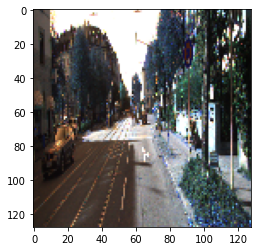

In [ ]:
plt.imshow(X[1])

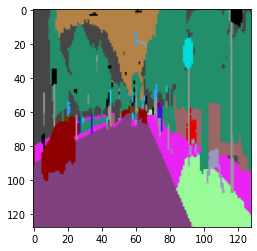

In [ ]:
plt.imshow(y[1])

(375, 1242, 3)


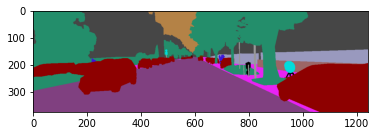

In [ ]:
a='./training/semantic_rgb/000000_10.png'
img=cv2.imread(a,1)
print(img.shape)
plt.imshow(img)

# Preprocessing

Splitting the dataset into training and testing sets

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15 , random_state=2019)

**Resnet:** A residual neural networ (Resnet) is an ANN of a kind that builds on constructs known as pyramidal cells in cerebral cortex

In [ ]:
BACKBONE = 'resnet34'
preprocess_input = get_preprocessing(BACKBONE)

In [ ]:
x_train = preprocess_input(X_train)
x_val = preprocess_input(X_valid)

In [ ]:
x_val.shape

(30, 128, 128, 3)

In [ ]:
x_train.shape

(170, 128, 128, 3)

# Building the Model

**inceptionv3** is a widely used recognition model that has been shown to atten greater then 78% accuracy on ImageNet dataset
<br/>

In [ ]:
N= x_train.shape[-1]

base_model= Unet(backbone_name='inceptionv3', encoder_weights='imagenet')

inp= Input(shape =(128, 128, N))

#map N channel data to 3 channels, strides = (1,1)
l1 = Conv2D(3, (1,1))(inp) 
out= base_model(l1)

l2 = Conv2D(3, (1,1))(out) 
model = Model(inp, l2, name= base_model.name)

<br/><br/>
**Dice Coefficient:** The Dice coefficient is very similar to the IoU. They are positively correlated, meaning if one says model A is better than model B at segmenting an image, then the other will say the same. Like the IoU, they both range from 0 to 1, with 1 signifying the greatest similarity between predicted and truth.

In [ ]:
def dice_coefficient (y_true, y_pred):
  numerator = 2* tf.reduce_sum(y_true*y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return numerator/(denominator + tf.keras.backend.epsilon())

# episilon >>> 1e-07

**Loss**<br/>
**Binary Cross Entropy:** Binary crossentropy is a loss function that is used in binary classification tasks. These are tasks that answer a question with only two choices (yes or no, A or B, 0 or 1, left or right). Several independent such questions can be answered at the same time, as in multi-label classification or in binary image segmentation.

In [ ]:
def loss(y_true, y_pred):
  return binary_crossentropy(y_true, y_pred)- tf.log(dice_coefficient(y_true, y_pred)+ tf.keras.backend.epsilon())

## Compiling the Model

In [ ]:
model.compile('Adam', loss=loss, metrics=[dice_coefficient])

# Fitting the Model

In [ ]:
model.fit(x=x_train, y=y_train , batch_size= 10, epochs=100, validation_data=(x_val, y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 170 samples, validate on 30 samples
Epoch 1/100
170/170 [==============================] - 181s 1s/step - loss: 6.9237 - dice_coefficient: 0.1446 - val_loss: 6.0396 - val_dice_coefficient: 0.2050
Epoch 2/100
170/170 [==============================] - 143s 842ms/step - loss: 6.3095 - dice_coefficient: 0.2049 - val_loss: 5.9372 - val_dice_coefficient: 0.2166
Epoch 3/100
170/170 [==============================] - 143s 843ms/step - loss: 4.9569 - dice_coefficient: 0.2194 - val_loss: 7.4530 - val_dice_coefficient: 0.1975
Epoch 4/100
170/170 [==============================] - 143s 842ms/step - loss: 4.1551 - dice_coefficient: 0.1984 - val_loss: 6.4509 - val_dice_coefficient: 0.1813
Epoch 5/100
170/170 [==============================] - 151s 889ms/step - loss: 3.7048 - dice_coefficient: 0.1839 - val_loss: 7.1534 - val_dice_coefficient: 0.2252
Epoch 6/100
170/170 [==============================] - 146s 859ms/step - loss: 3.3677 - dice_co

In [ ]:
model.evaluate(x_val, y_valid, verbose=1)

30/30 [==============================] - 7s 217ms/step


[1.3461830615997314, 0.5216421484947205]

# Predicting the Model

In [ ]:
preds_train = model.predict(x_train, verbose =1)
predes_val = model.predict(x_val, verbose=1)

30/30 [==============================] - 6s 198ms/step


In [ ]:
preds_train[0].shape

(128, 128, 3)

# Saving the Model

In [ ]:
# Save Weights
from keras.models import model_from_json

# serialize model to json
model_json = model.to_json()
with open ("model.json", "w") as json_file:
  json_file.write(model_json)

#serialize  weights to HDF5
model.save_weights("model.h5")
print("Model Saved to Disk")



Model Saved to Disk


# Output

Test Case 01

Test Case 02

Test Case 03

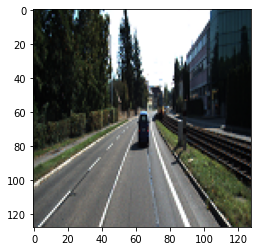

In [ ]:
plt.imshow(x_train[110])

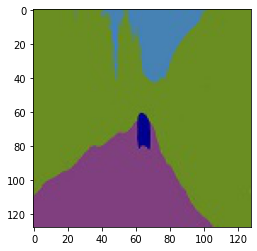

In [ ]:
plt.imshow(preds_train[110])

Test Case 04

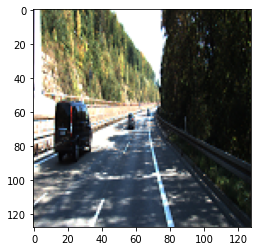

In [ ]:
plt.imshow(x_train[190])

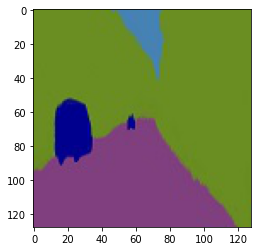

In [ ]:
plt.imshow(preds_train[190])

Test Case 05

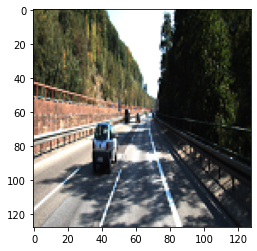

In [ ]:
plt.imshow(x_train[192])

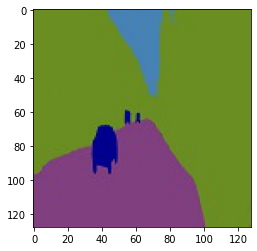